# 03 – Confusion Matrix Analysis

**Module:** Anomaly & Fraud Detection  
**Topic:** Rare-Event Evaluation Metrics

This notebook demonstrates **detailed confusion matrix analysis** for rare-event datasets.
Confusion matrices help quantify false positives and false negatives, essential for fraud detection.

## Objective

Build a workflow that:
- Computes and visualizes confusion matrix
- Provides class-specific insights
- Supports business-aligned decision-making
- Works with probabilistic thresholds

## Design Principles

✔ Evaluate on real distribution  
✔ Threshold-sensitive  
✔ Class-specific analysis  
✔ Visualizable for stakeholder communication

## High-Level Workflow

Trained Model  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Predict Probabilities on Test/Validation  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Apply Threshold  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Compute Confusion Matrix & Metrics  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Visualize & Interpret

## Imports and Setup



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(2010)

 ## Simulated Imbalanced Fraud Dataset 

In [13]:
X, y = make_classification(
    n_samples=10000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    weights=[0.985, 0.015],
    flip_y=0.001,
    random_state=2010
)

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["fraud"] = y

 ## Leakage-Free Train/Test Split 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="fraud"), df["fraud"],
    test_size=0.3, stratify=df["fraud"], random_state=42
)

## Train Weighted Model

In [20]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

 ## Predict Probabilities and Apply Threshold 

In [23]:
y_probs = model.predict_proba(X_test)[:,1]
best_threshold = 0.5  # Example threshold; could be optimized

y_pred = (y_probs >= best_threshold).astype(int)

 ## Confusion Matrix Computation

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual_NonFraud", "Actual_Fraud"], columns=["Pred_NonFraud", "Pred_Fraud"])

print("Confusion Matrix:\n", cm_df)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
                  Pred_NonFraud  Pred_Fraud
Actual_NonFraud           2055         898
Actual_Fraud                17          30

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82      2953
           1       0.03      0.64      0.06        47

    accuracy                           0.69      3000
   macro avg       0.51      0.67      0.44      3000
weighted avg       0.98      0.69      0.81      3000



  ## Visualization 

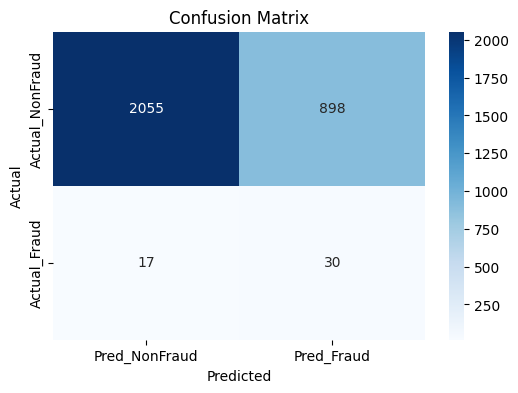

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## Interpretation

- False negatives are critical in fraud detection
- Confusion matrix provides raw counts for business evaluation
- Threshold adjustments can shift trade-offs
- Class-specific metrics help set alert priorities


## Production Checklist

✔ Evaluate on real distribution  
✔ Thresholds aligned with risk  
✔ Metrics visualized for stakeholders  
✔ Periodic monitoring of FP/FN rates


## Key Takeaways

- Confusion matrices are essential for operational decision-making  
- Combine with cost-sensitive metrics for actionable insights  
- Use visualization for clear communication


## Next Steps

- Integrate with threshold optimization based on F1, PR-AUC, or cost metrics  
- Compare confusion matrices across class weighting, resampling, and focal loss methods  
- Monitor FP/FN drift in production systems